In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
# Load the dataset
places_df = pd.read_csv("final_places.csv")  # Ensure the file is in the same directory as the notebook

# Display first few rows
places_df.head()


,city,places name,Rating,distance,category,places description
0,Kutch,Rann of Kutch,4.4,45,Wildlife/Nature,"Rann of Kutch , a large area of salt marshes i..."
1,Kutch,Kutch Desert Wildlife Sanctuary,3.6,135,Wildlife/Nature,"Less than 100 km away from Bhuj, this sanctuar..."
2,Kutch,Dholavira,3.6,40,Historical,It is one of the largest remarkable excavation...
3,Kutch,Kutch Museum,3.6,57,Historical,"The oldest museum of Gujarat, the Kutch Museum..."
4,Kutch,Kutch Bustard Sanctuary,3.6,130,Wildlife/Nature,Also known locally as the Lala Prajan Sanctuar...


In [5]:
# Ensure 'Category' column is in lowercase for consistency
places_df["category"] = places_df["category"].astype(str).str.lower()
places_df["category"].unique()

array(['wildlife/nature', 'historical', 'beaches', 'urban/modern',
       'lakes/rivers', 'adventure', 'mountains', 'temple', 'other',
       'spiritual'], dtype=object)

In [6]:
# TF-IDF Vectorization on Category column
tfidf_vectorizer = TfidfVectorizer()
category_tfidf_matrix = tfidf_vectorizer.fit_transform(places_df["category"])

# Compute cosine similarity between all places based on category
category_similarity = cosine_similarity(category_tfidf_matrix, category_tfidf_matrix)

print(" TF-IDF and Cosine Similarity Computed!")
print("Shape of Similarity Matrix:", category_similarity.shape)



 TF-IDF and Cosine Similarity Computed!
Shape of Similarity Matrix: (344, 344)


In [5]:
# Convert similarity matrix to a DataFrame
similarity_df = pd.DataFrame(category_similarity)

# Display first 10 rows and 10 columns for readability
print("Category-Based Similarity Matrix (First 10 Rows & Columns):")
similarity_df.iloc[:10, :10]


Category-Based Similarity Matrix (First 10 Rows & Columns):


,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
def recommend_places_ml(selected_category, df=places_df, similarity_matrix=category_similarity, top_n=15):
    # Convert selected category to lowercase for matching
    selected_category = selected_category.lower()

    # Get indices of places belonging to the selected category
    category_indices = df[df["category"] == selected_category].index.tolist()

    if not category_indices:
        return f"No places found for category: {selected_category}."

    # Collect similarity scores for all places with respect to the selected category places
    similarity_scores = similarity_matrix[category_indices].mean(axis=0)

    # Rank places based on similarity and rating
    df["Similarity_Score"] = similarity_scores
    recommended_places = df.sort_values(by=["Similarity_Score", "Rating"], ascending=[False, False]).head(top_n)

    return recommended_places[["places name", "Rating", "places name", "distance","category"]]



In [23]:
# Example: Recommend top 5 places for category "Beaches"
recommended_places = recommend_places_ml("Beaches", top_n=15)

# Display results
recommended_places


,places name,Rating,places name,distance,category
260,Somnath Beach,4.4,Somnath Beach,3,beaches
295,Suvali Beach,4.4,Suvali Beach,18,beaches
87,Mandvi Beach,4.2,Mandvi Beach,58,beaches
277,Dumas Beach,4.2,Dumas Beach,13,beaches
298,Umbhrat Beach,4.2,Umbhrat Beach,21,beaches
289,Hajira Beach,4.1,Hajira Beach,20,beaches
314,Dabhari Beach,4.1,Dabhari Beach,25,beaches
134,Fun World,3.9,Fun World,4,beaches
160,Madhavpur Beach,3.9,Madhavpur Beach,60,beaches
264,Chorwad Beach,3.9,Chorwad Beach,35,beaches


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert similarity matrix to DataFrame for better visualization
similarity_df = pd.DataFrame(category_similarity, index=places_df["places name"], columns=places_df["places name"])

# Display first few rows of similarity matrix
print("✅ Similarity Matrix (First 10 Rows & Columns):")
similarity_df.iloc[:10, :10]  # Show only a small part to keep it readable


✅ Similarity Matrix (First 10 Rows & Columns):


places name,Rann of Kutch,Kutch Desert Wildlife Sanctuary,Dholavira,Kutch Museum,Kutch Bustard Sanctuary,"Mandvi Beach, Bhuj",Shopping in Kutch,"Aaina Mahal, Bhuj",Kandla Port and Mudra port,"Narayan Sarovar, Bhuj"
places name,,,,,,,,,,
Rann of Kutch,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Kutch Desert Wildlife Sanctuary,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Dholavira,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Kutch Museum,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Kutch Bustard Sanctuary,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"Mandvi Beach, Bhuj",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Shopping in Kutch,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
"Aaina Mahal, Bhuj",0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Kandla Port and Mudra port,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


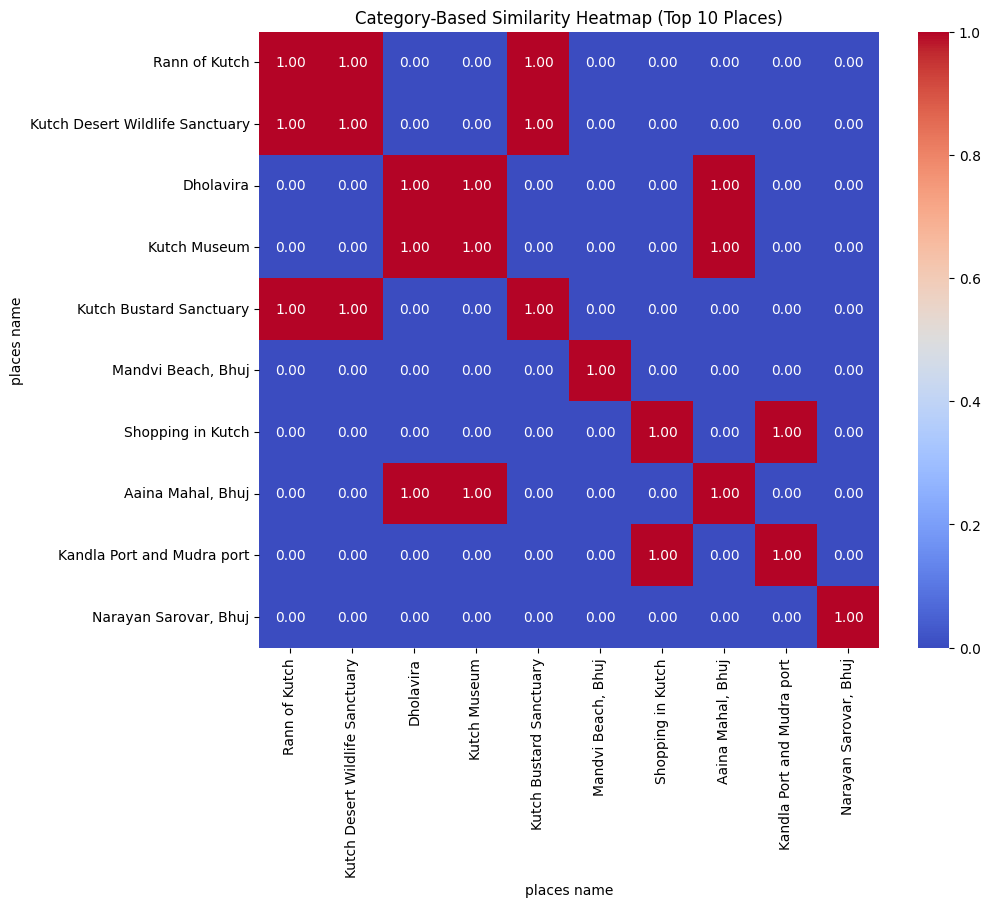

In [25]:
# Plot heatmap for a small portion of the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df.iloc[:10, :10], cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Category-Based Similarity Heatmap (Top 10 Places)")
plt.show()


In [26]:
import pandas as pd
hotel_df = pd.read_csv("final_hotel.csv")  # Ensure the file is in the same directory as the notebook

# Display first few rows
hotel_df.head()

,hotel name,rating,rating text,place,near by place,discount price,actual price,facilities,destination name
0,The Fern Sattva Resort - Polo Forest,4.3,Excellent,Abhapur,96.8 km from Ambaji city centre,3896,6449,Spa,ambaji
1,Pride Resort Ambaji,3.8,Very Good,Ambaji,Not Available,2171,2875,Swimming Pool,ambaji
2,Royal Inn Hotel,3.9,Very Good,Danta Road,Not Available,1356,2600,Restaurant,ambaji
3,hotel leela residency,3.9,Very Good,Khodiyar Chowk,Not Available,1282,1500,Air Conditioning,ambaji
4,HOTEL KARDHAR INN,4.2,Very Good,Khodiyar Chowk,Not Available,1563,3000,Butler Services,ambaji


In [27]:
from sklearn.preprocessing import MinMaxScaler

def ml_recommend_hotels(selected_place, hotel_df, top_n=15):
    # Filter hotels in the selected place or destination
    filtered_hotels = hotel_df[
        (hotel_df["place"].str.lower() == selected_place.lower()) |
        (hotel_df["destination name"].str.lower() == selected_place.lower())
    ].copy()

    if filtered_hotels.empty:
        return "No hotels found for this location."

    # Normalize Rating & Price (since price is to be minimized, inverse it)
    scaler = MinMaxScaler()
    filtered_hotels["normalized_rating"] = scaler.fit_transform(filtered_hotels[["rating"]])
    filtered_hotels["normalized_price"] = 1 - scaler.fit_transform(filtered_hotels[["discount price"]])  # Invert price
    
    # Compute a Weighted Score (Higher Rating & Lower Price)
    filtered_hotels["ml_score"] = (0.7 * filtered_hotels["normalized_rating"]) + (0.3 * filtered_hotels["normalized_price"])
    
    # Sort by ML Score
    ranked_hotels = filtered_hotels.sort_values(by="ml_score", ascending=False)
    
    # Return the top N hotels
    return ranked_hotels.head(top_n)[["hotel name", "rating", "discount price", "actual price", "facilities", "ml_score"]]

# Example usage:
selected_place = "surat"  # Change based on user selection
ml_recommend_hotels(selected_place, hotel_df)


,hotel name,rating,discount price,actual price,facilities,ml_score
1324,Hotel Sahyog Baleshwar,4.8,1023,1500,Restaurant,0.958469
1315,The Augusta Club & Resort,5.0,5013,6299,Gym,0.937903
1322,Hotel New Platinum 9,4.7,1897,2899,24-hour Room Service,0.928797
1270,WEEKEND STAYS,4.7,2392,3200,Air Conditioning,0.921903
1447,SHRI GURUDEV LUXURIOUS AC DORMITORY,4.5,687,900,Air Conditioning,0.910648
1266,VHHS Studio Apartment in Weekend Address,4.5,1791,2300,Shared Swimming Pool,0.895273
1354,Hotel Merit,4.5,1844,3019,Restaurant,0.894535
1328,Hotel Prime,4.5,1954,2284,Restaurant,0.893003
1215,Hotel Pearl Residency,4.4,1134,4000,24-hour Room service,0.886923
1264,Hotel Sapphire 26,4.4,1801,3800,Restaurant,0.877634


In [29]:
import pandas as pd

# Load the hotel dataset
file_path = "final_hotel.csv"  # Change path if needed
hotel_df = pd.read_csv(file_path)

# Display basic information about the dataset
hotel_df.info()

# Show first 5 rows
hotel_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hotel name        2365 non-null   object 
 1   rating            2365 non-null   float64
 2   rating text       2365 non-null   object 
 3   place             2365 non-null   object 
 4   near by place     2365 non-null   object 
 5   discount price    2365 non-null   int64  
 6   actual price      2365 non-null   int64  
 7   facilities        2365 non-null   object 
 8   destination name  2365 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 166.4+ KB


,hotel name,rating,rating text,place,near by place,discount price,actual price,facilities,destination name
0,The Fern Sattva Resort - Polo Forest,4.3,Excellent,Abhapur,96.8 km from Ambaji city centre,3896,6449,Spa,ambaji
1,Pride Resort Ambaji,3.8,Very Good,Ambaji,Not Available,2171,2875,Swimming Pool,ambaji
2,Royal Inn Hotel,3.9,Very Good,Danta Road,Not Available,1356,2600,Restaurant,ambaji
3,hotel leela residency,3.9,Very Good,Khodiyar Chowk,Not Available,1282,1500,Air Conditioning,ambaji
4,HOTEL KARDHAR INN,4.2,Very Good,Khodiyar Chowk,Not Available,1563,3000,Butler Services,ambaji


In [155]:
from sklearn.preprocessing import MinMaxScaler

# Make a copy of the dataset to avoid modifying the original
hotel_df_clean = hotel_df.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize Rating (higher is better)
hotel_df_clean["normalized_rating"] = scaler.fit_transform(hotel_df_clean[["rating"]])

# Normalize Price (lower is better, so we inverse it)
hotel_df_clean["normalized_price"] = 1 - scaler.fit_transform(hotel_df_clean[["discount price"]])

# Show updated dataframe
hotel_df_clean.head()


,hotel name,rating,rating text,place,near by place,discount price,actual price,facilities,destination name,normalized_rating,normalized_price
0,The Fern Sattva Resort - Polo Forest,4.3,Excellent,Abhapur,96.8 km from Ambaji city centre,3896,6449,Spa,ambaji,0.825,0.919655
1,Pride Resort Ambaji,3.8,Very Good,Ambaji,Not Available,2171,2875,Swimming Pool,ambaji,0.700,0.958250
2,Royal Inn Hotel,3.9,Very Good,Danta Road,Not Available,1356,2600,Restaurant,ambaji,0.725,0.976485
3,hotel leela residency,3.9,Very Good,Khodiyar Chowk,Not Available,1282,1500,Air Conditioning,ambaji,0.725,0.978141
4,HOTEL KARDHAR INN,4.2,Very Good,Khodiyar Chowk,Not Available,1563,3000,Butler Services,ambaji,0.800,0.971854


In [28]:
def ml_recommend_hotels(selected_place, hotel_df, top_n=15):
    """
    Recommends top N hotels in the selected place based on an ML score.
    ML Score = (0.7 * Normalized Rating) + (0.3 * Normalized Inverted Price)
    """
    # Filter hotels based on place or destination name
    filtered_hotels = hotel_df[
        (hotel_df["place"].str.lower() == selected_place.lower()) |
        (hotel_df["destination name"].str.lower() == selected_place.lower())
    ].copy()

    if filtered_hotels.empty:
        return "No hotels found for this location."

    # Compute ML Score: Higher rating and lower price
    filtered_hotels["ml_score"] = (0.7 * filtered_hotels["normalized_rating"]) + (0.3 * filtered_hotels["normalized_price"])

    # Sort by ML Score (Higher is better)
    ranked_hotels = filtered_hotels.sort_values(by="ml_score", ascending=False)

    # Return the top N hotels
    return ranked_hotels.head(top_n)[["hotel name", "rating", "discount price", "actual price", "facilities", "ml_score"]]


In [157]:
# Example: User selects "Ambaji"
selected_place = "Ambaji"
recommended_hotels = ml_recommend_hotels(selected_place, hotel_df_clean)

# Display Results
recommended_hotels


,hotel name,rating,discount price,actual price,facilities,ml_score
23,RAWLA HOMESTAY,5.0,4086,4800,Caretaker,0.974621
10,Hotel Pushpa Inn,4.4,1136,1500,24-hour Room service,0.889422
38,Hillcrest Hotel and Resort,4.5,5330,6000,Swimming Pool,0.878771
6,SHREE HOTEL,4.2,852,1500,Restaurant,0.856328
43,Hotel Shreeji Palace,4.2,1144,1700,24-hour Room service,0.854368
0,The Fern Sattva Resort - Polo Forest,4.3,3896,6449,Spa,0.853397
51,HOTEL SAVERA PALACE,4.2,1299,2200,Restaurant,0.853328
4,HOTEL KARDHAR INN,4.2,1563,3000,Butler Services,0.851556
8,Hotel Rajmandir,4.1,949,1390,24-hour Room service,0.838177
9,Hotel Omkar,4.1,1709,2000,Butler Services,0.833076


In [158]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\91873\AppData\Local\Temp\ipykernel_2276\3071062973.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


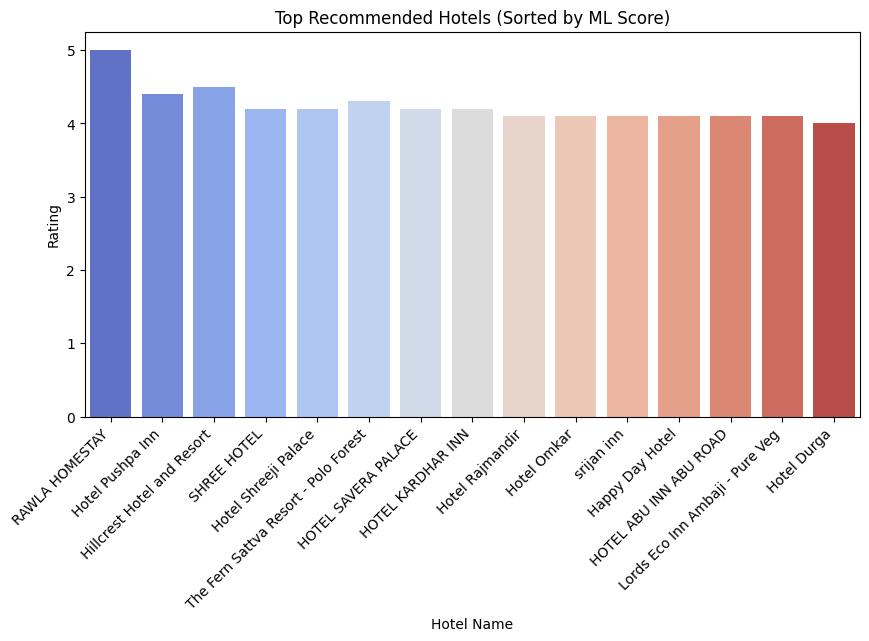

In [159]:
#  Bar Chart of Top Recommended Hotels

def plot_top_hotels(recommended_hotels):
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=recommended_hotels, 
        x="hotel name", 
        y="rating", 
        palette="coolwarm"
    )
    
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Hotel Name")
    plt.ylabel("Rating")
    plt.title("Top Recommended Hotels (Sorted by ML Score)")
    plt.show()

# Run visualization for recommended hotels
plot_top_hotels(recommended_hotels)


📊 What this does:  

Shows the top recommended hotels sorted by ML score.
Colors represent ratings.
Easy to compare hotel rankings.

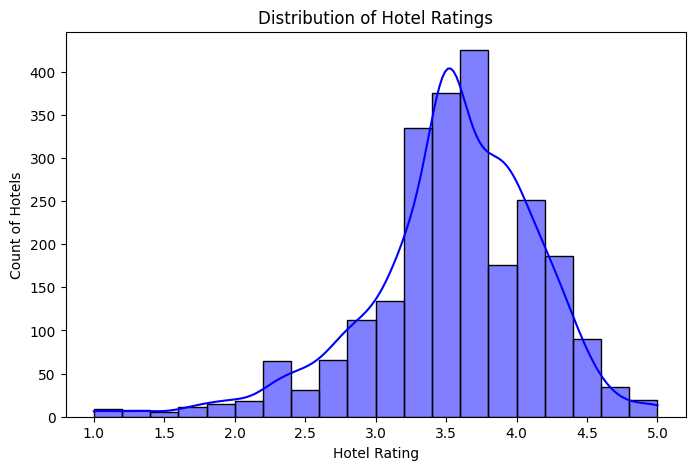

In [160]:
#  Histogram of Hotel Ratings

plt.figure(figsize=(8, 5))
sns.histplot(hotel_df_clean["rating"], bins=20, kde=True, color="blue")

plt.xlabel("Hotel Rating")
plt.ylabel("Count of Hotels")
plt.title("Distribution of Hotel Ratings")
plt.show()


📊 What this does:

Shows the distribution of hotel ratings across all data.
Helps understand if most hotels have high or low ratings.

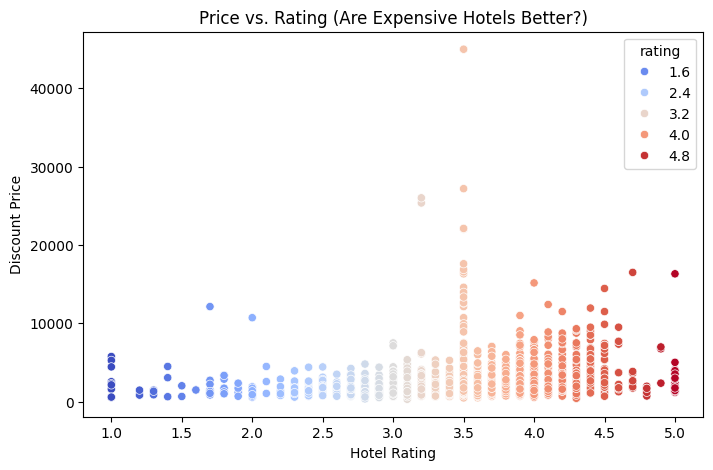

In [161]:
#  Scatter Plot of Price vs. Rating

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=hotel_df_clean, 
    x="rating", 
    y="discount price", 
    hue="rating", 
    palette="coolwarm"
)

plt.xlabel("Hotel Rating")
plt.ylabel("Discount Price")
plt.title("Price vs. Rating (Are Expensive Hotels Better?)")
plt.show()


📊 What this does:

Shows the relationship between price & rating.
Helps answer: Are expensive hotels always higher rated?

In [19]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
places = pd.read_csv('final_places.csv')
hotels = pd.read_csv('final_hotel.csv')

# Data Preparation for Destination Suggestion
places['combined'] = places['category'] + ' ' + places['city']
vectorizer = CountVectorizer()
place_vectors = vectorizer.fit_transform(places['combined'])
similarity_matrix = cosine_similarity(place_vectors)

# Destination Suggestion Function
def get_destination_recommendations():
    category = input("Select Destination Type (category): ")
    city = input("Select Preferred City: ")

    filtered_places = places[(places['category'].str.contains(category, case=False, na=False)) &
                             (places['city'].str.contains(city, case=False, na=False))]
    if filtered_places.empty:
        return f"No places found for category '{category}' in the city: {city}."

    filtered_vectors = vectorizer.transform(filtered_places['combined'])
    query_vector = vectorizer.transform([category + ' ' + city])
    similarity_scores = cosine_similarity(query_vector, filtered_vectors)[0]

    filtered_places['similarity'] = similarity_scores
    recommended_places = filtered_places.sort_values(by='similarity', ascending=False).head(10)

    return recommended_places[['place', 'category', 'city']]

rint("\n--- Destination Recommendations ---")
print(get_destination_recommendations())

KeyError: 'category'